In [144]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [145]:
cancer=load_breast_cancer()

In [146]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=50)

In [147]:
y_train=y_train.reshape(1,-1)  #expand 1D -> 2D Array
y_test=y_test.reshape(1,-1)

In [148]:
X_train=X_train.T
X_test=X_test.T

In [149]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [150]:
def Initialize_with_zeros(dim):
    w=np.random.normal(size=dim).reshape(dim,1)*0.01
#     w=np.zeros(dim).reshape(dim,1)
    b=0
    return w,b

In [151]:
def propagate(X,Y,w,b):
    m=X.shape[1]
    A=sigmoid(np.dot(w.T,X)+b)
    loss=[]
    cost=-1/m * np.sum(Y*np.log(A+10e-20)+(1-Y)*np.log(1-A+10e-20))
    loss.append(Y*np.log(A+10e-20)+(1-Y)*np.log(1-A+10e-20))
    dZ=A-Y
    dw=1/m*np.dot(X,dZ.T)
    db=1/m*(np.sum(dZ))
    grads={'dw':dw,
          'db':db}
    cost=np.squeeze(cost)
    
    return grads,cost,loss

In [152]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=True):
    costs=[]
    lossz=[]
    for i in range(num_iterations):
        grads,cost,loss=propagate(X,Y,w,b)
        dw=grads['dw']
        db=grads['db']
        w=w-(learning_rate *dw)
        b=b-(learning_rate*db)
        if i%100==0:
            costs.append(cost)
            lossz.append(loss)
            if print_cost:
                print('Cost After Iteration:{}  {:.4f}'.format(i,cost))
    params={'w':w,
            'b':b}
    grads={'dw':dw,
           'db':db}
    return params,grads,costs,lossz

In [153]:
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape(X.shape[0],1)
    A=sigmoid((np.dot(w.T,X)+b))
    for i in range(A.shape[1]):
        if(A[0,i]>0.5):
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    
    return Y_prediction
    
    

In [154]:
def Logistic_Regression_Model(X_train,X_test,y_train,y_test,num_iterations=2000,
                             learning_rate=0.5,print_cost=True):
    w,b=Initialize_with_zeros(X_train.shape[0])
    params,grads,costs,lossz=optimize(w,b,X_train,y_train,num_iterations,print_cost)
    w=params['w']
    b=params['b']
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    print("Train Set Accuracy:{:.4f}".format(100-100*np.mean(np.abs(Y_prediction_train-y_train))))
    print("Test Set Accuracy:{:.4f}".format(100-100*np.mean(np.abs(Y_prediction_test-y_test))))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations,
        "loss":lossz}
    
    return d

In [155]:
d=Logistic_Regression_Model(X_train,X_test,y_train,y_test,7000,learning_rate=1)

Cost After Iteration:0  10.2407
Cost After Iteration:100  13.4534
Cost After Iteration:200  3.9025
Cost After Iteration:300  4.6214
Cost After Iteration:400  4.8268
Cost After Iteration:500  4.9295
Cost After Iteration:600  4.5187
Cost After Iteration:700  4.6214
Cost After Iteration:800  4.7241
Cost After Iteration:900  4.8268
Cost After Iteration:1000  3.3929
Cost After Iteration:1100  3.4917
Cost After Iteration:1200  3.4917
Cost After Iteration:1300  4.4160
Cost After Iteration:1400  4.5774
Cost After Iteration:1500  4.5187
Cost After Iteration:1600  3.3890
Cost After Iteration:1700  3.3890
Cost After Iteration:1800  3.2863
Cost After Iteration:1900  3.2863
Cost After Iteration:2000  3.2863
Cost After Iteration:2100  3.2863
Cost After Iteration:2200  4.0052
Cost After Iteration:2300  3.4917
Cost After Iteration:2400  3.3890
Cost After Iteration:2500  3.2863
Cost After Iteration:2600  4.7241
Cost After Iteration:2700  5.3403
Cost After Iteration:2800  5.3403
Cost After Iteration:290

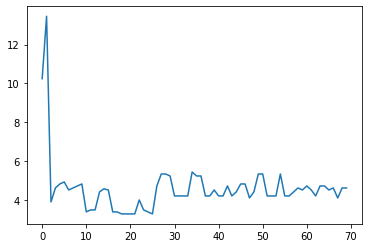

In [157]:
plt.plot(d['costs'])

In [158]:
lossarray=np.array(d['loss'])

In [159]:
losar=lossarray.reshape(70,426)

In [160]:
lo_df=pd.DataFrame(losar)

In [161]:
lo_df

,0,1,2,3,4,5,6,7,8,9,...,416,417,418,419,420,421,422,423,424,425
0,-9.22636,-18.478377,-14.672047,-20.509958,-9.480982,-6.152086,-7.105427e-15,-18.670649,-3.346223e-11,0.000000,...,-1.088019e-14,-27.275667,-21.187379,0.000000,-3.571197e-09,0.0,-9.769963e-15,-13.655709,-14.667192,-16.086551
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.374912e+01,0.000000,-4.374912e+01,-43.749117,...,-4.374912e+01,0.000000,0.000000,-43.749117,-4.374912e+01,0.0,-4.374912e+01,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000
66,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000
67,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000
68,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,-4.374912e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000


In [ ]:
asdf